# Simulation

This is the experiment to generate simulation data


In [1]:
%load_ext rpy2.ipython

In [2]:
import sys 
import os
import math
import datetime
import os
import json
import re
import pprint
import pandas as pd
from subprocess import *
import subprocess
import numpy as np
from importlib import reload  # Python 3.4+ only.
from IPython.display import Image

cwd = os.getcwd()
print(cwd)
# Adapt this path, it needs to point on the folder containing experiments/exptools.py.
sys.path.insert(1, os.path.abspath("src"))
import analysis
reload(analysis)

/home/adfaure/Projects/ptask-eval/analysis


<module 'analysis' from '/home/adfaure/Projects/ptask-eval/analysis/src/analysis.py'>

In [3]:
period = 60 # s

def adhoc_interference(fast_rate, alpha, slow_rate, beta, period, saveto = None):
    csv = "remaining,time\n"
    remaining = 0
    predicted_time = 0
    csv += "{},{}\n".format(remaining, predicted_time)
    while remaining < 1:
        
        time_fast_phase = period * alpha
        advancement_fast_phase = time_fast_phase * fast_rate
        remaining += advancement_fast_phase
        predicted_time += time_fast_phase

        if(remaining > 1):
            print("overshoot fast: time: {}, remain: {}".format(predicted_time, remaining))
            to_revert = remaining - 1
            print("to revert: {}".format(to_revert))

            time_reverted = to_revert / fast_rate
            
            predicted_time -= time_reverted
            remaining -= to_revert
            csv += "{},{}\n".format(remaining, predicted_time)
            break

        if(alpha != 0):
            csv += "{},{}\n".format(remaining, predicted_time)

        time_slow_phase = period * beta
        advancement_slow_phase = time_slow_phase * slow_rate
        remaining += advancement_slow_phase
        predicted_time += time_slow_phase
        
        if(remaining > 1):
            print("overshoot slow: time: {}, remain: {}".format(predicted_time, remaining))
            to_revert = remaining - 1
            print("to revert: {}".format(to_revert))
            time_reverted = to_revert / slow_rate
            predicted_time -= time_reverted
            remaining -= to_revert
            csv += "{},{}\n".format(remaining, predicted_time)
            break
        if(beta != 0):
            csv += "{},{}\n".format(remaining, predicted_time)
        

    if saveto is not None:
        with open(saveto,'w',encoding = 'utf-8') as f:
            f.write(csv)
    return predicted_time

csv = ""
csv += "slow,fast,predicted_time,src\n"

progress_rate_fast_grisou = 1/379
progress_rate_slow_grisou = 1/1455.86
for (idle, inter) in [(0.5, 0.5), (0.25, 0.75), (0.75, 0.25), (0, 1), (1, 0)]:
    predicted = adhoc_interference(progress_rate_fast_grisou, idle, progress_rate_slow_grisou, inter,period, saveto="data/grisou{}_{}.csv".format(idle,inter))
    csv += str(period * inter) + "," + str(period * idle) + "," + str(predicted) + ",Grisou\n"

progress_rate_fast_ptask = 1/312
progress_rate_slow_ptask = 1/935
for (idle, inter) in [(0.5, 0.5), (0.25, 0.75), (0.75, 0.25), (0, 1), (1, 0)]:
    predicted = adhoc_interference(progress_rate_fast_ptask, idle, progress_rate_slow_ptask, inter,period)
    csv += str(period * inter) + "," + str(period * idle) + "," + str(predicted) + ",Ptask\n"

print("parasilo")
# Parasilo : Blocking / 50 subdivisions
progress_rate_fast_parasilo = 1/374.29
progress_rate_slow_parasilo = 1/430.49
for (idle, inter) in [(0.5, 0.5), (0.25, 0.75), (0.75, 0.25), (0, 1), (1, 0)]:
    predicted = adhoc_interference(progress_rate_fast_parasilo, 
                                   idle, progress_rate_slow_parasilo, inter, 
                                   period, saveto="data/paravance{}_{}.csv".format(idle,inter))
    csv += str(period * inter) + "," + str(period * idle) + "," + str(predicted) + ",Paravance\n"

with open("data/adhoc.csv",'w',encoding = 'utf-8') as f:
    f.write(csv)

overshoot fast: time: 630.0, remain: 1.076776170923391
to revert: 0.07677617092339095
overshoot fast: time: 855.0, remain: 1.0264014628969045
to revert: 0.026401462896904482
overshoot fast: time: 465.0, remain: 1.0219903933324215
to revert: 0.021990393332421476
overshoot slow: time: 1500, remain: 1.0303188493399091
to revert: 0.030318849339909137
overshoot fast: time: 420, remain: 1.1081794195250658
to revert: 0.10817941952506582
overshoot slow: time: 480.0, remain: 1.025915261209379
to revert: 0.025915261209378926
overshoot fast: time: 615.0, remain: 1.010129576306047
to revert: 0.010129576306046939
overshoot fast: time: 405.0, remain: 1.1058720691073631
to revert: 0.10587206910736313
overshoot slow: time: 960, remain: 1.0267379679144388
to revert: 0.02673796791443883
overshoot fast: time: 360, remain: 1.1538461538461537
to revert: 0.15384615384615374
parasilo
overshoot slow: time: 420.0, remain: 1.0488784873486074
to revert: 0.04887848734860745
overshoot slow: time: 420.0, remain: 1.

/nix/store/3dg392sa75qgijha0j1kn51f8fj87z9q-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/nix/store/3dg392sa75qgijha0j1kn51f8fj87z9q-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: ✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0

  warnings.warn(x, RRuntimeWarning)
/nix/store/3dg392sa75qgijha0j1kn51f8fj87z9q-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)
/nix/store/3dg392sa75qgijha0j1kn51f8fj87z9q-python3-3.7.3-env/lib/python3.7/site-packa

# A tibble: 61 x 3
   remaining  time src  
       <dbl> <dbl> <chr>
 1     0        0  fast 
 2     0.160   60  fast 
 3     0.321  120  fast 
 4     0.481  180  fast 
 5     0.641  240  fast 
 6     0.802  300  fast 
 7     0.962  360  fast 
 8     1      374. fast 
 9     0        0  slow 
10     0.139   60  slow 
# … with 51 more rows


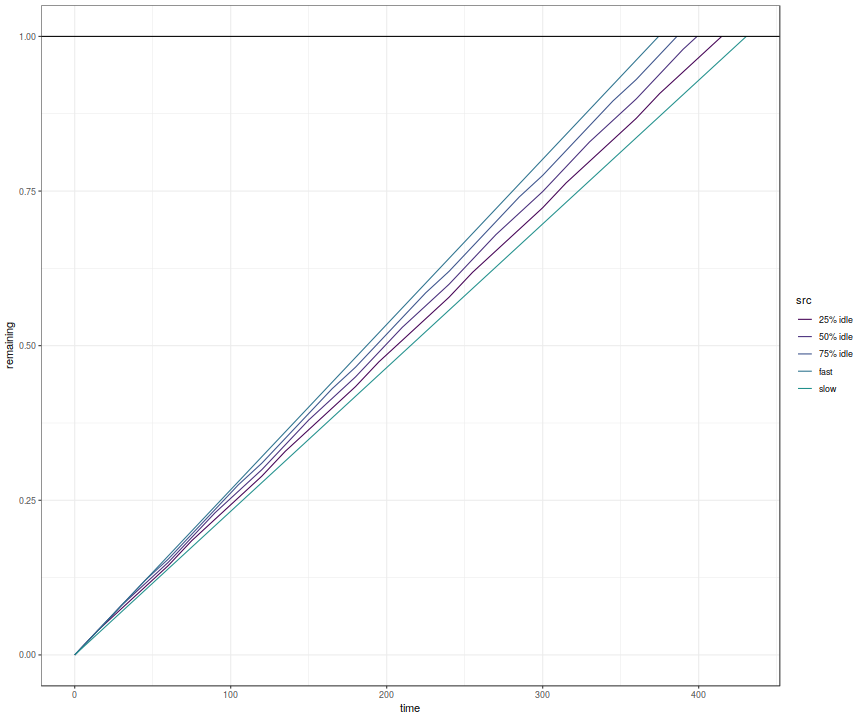

In [4]:
%%R  -w 12 -h 10 --units in

library(tidyverse)

adapt = read_csv("data/paravance1_0.csv") %>% mutate(src = "fast") %>% 
            bind_rows(read_csv("data/paravance0_1.csv") %>% mutate(src = "slow")) %>%
            bind_rows(read_csv("data/paravance0.5_0.5.csv") %>% mutate(src = "50% idle")) %>%
            bind_rows(read_csv("data/paravance0.25_0.75.csv") %>% mutate(src = "25% idle" )) %>%
            bind_rows(read_csv("data/paravance0.75_0.25.csv") %>% mutate(src = "75% idle" ))

print(adapt)

adapt %>%
    ggplot(aes(x = time, y = remaining, color = src)) +
    geom_line() +
     geom_hline(yintercept= 1) +
    scale_color_viridis_d(end = 0.5) + 
    theme_bw() + expand_limits(x = 0, y = 0)


# A tibble: 86 x 3
   remaining  time src  
       <dbl> <dbl> <chr>
 1    0         0  fast 
 2    0.158    60  fast 
 3    0.317   120  fast 
 4    0.475   180  fast 
 5    0.633   240  fast 
 6    0.792   300  fast 
 7    0.950   360  fast 
 8    1       379. fast 
 9    0         0  slow 
10    0.0412   60  slow 
# … with 76 more rows


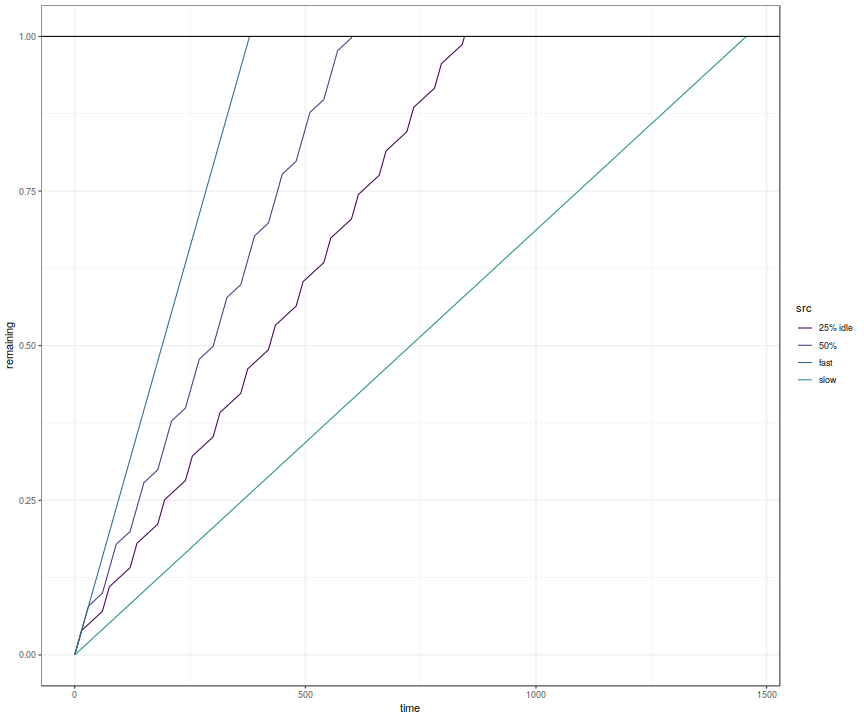

In [5]:
%%R  -w 12 -h 10 --units in

library(tidyverse)

adapt = read_csv("data/grisou1_0.csv") %>% mutate(src = "fast") %>% 
            bind_rows(read_csv("data/grisou0_1.csv") %>% mutate(src = "slow")) %>%
            bind_rows(read_csv("data/grisou0.5_0.5.csv") %>% mutate(src = "50%")) %>%
            bind_rows(read_csv("data/grisou0.25_0.75.csv") %>% mutate(src = "25% idle" ))

print(adapt)

adapt %>%
    ggplot(aes(x = time, y = remaining, color = src)) +
    geom_line() +
     geom_hline(yintercept= 1) +
    scale_color_viridis_d(end = 0.5) + 
    theme_bw() + expand_limits(x = 0, y = 0)

/nix/store/3dg392sa75qgijha0j1kn51f8fj87z9q-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Parsed with column specification:
cols(
  slow = col_double(),
  fast = col_double(),
  predicted_time = col_double(),
  src = col_character()
)

  warnings.warn(x, RRuntimeWarning)
/nix/store/3dg392sa75qgijha0j1kn51f8fj87z9q-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Parsed with column specification:
cols(
  slow = col_double(),
  fast = col_double(),
  predicted_time = col_double(),
  src = col_character(),
  interference = col_character()
)

  warnings.warn(x, RRuntimeWarning)
/nix/store/3dg392sa75qgijha0j1kn51f8fj87z9q-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: Saving 12 x 10 in image

  warnings.warn(x, RRuntimeWarning)


# A tibble: 15 x 5
    slow  fast predicted_time src       interference               
   <dbl> <dbl>          <dbl> <chr>     <chr>                      
 1    30    30           601. Grisou    30s interference / 30s idle
 2    45    15           845. Grisou    45s interference / 15s idle
 3    15    45           457. Grisou    15s interference / 45s idle
 4    60     0          1456. Grisou    Constant interference      
 5     0    60           379. Grisou    No interference            
 6    30    30           456. Ptask     30s interference / 30s idle
 7    45    15           612. Ptask     45s interference / 15s idle
 8    15    45           372. Ptask     15s interference / 45s idle
 9    60     0           935. Ptask     Constant interference      
10     0    60           312  Ptask     No interference            
11    30    30           399. Paravance 30s interference / 30s idle
12    45    15           415. Paravance 45s interference / 15s idle
13    15    45           386.

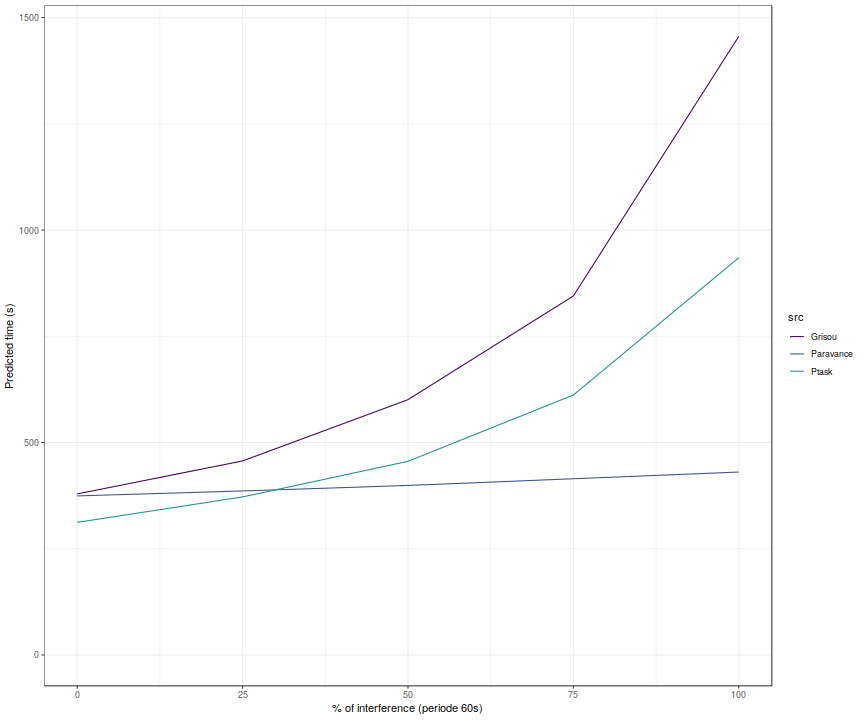

In [6]:
%%R  -w 12 -h 10 --units in
library(tidyverse)

adapt = read_csv("data/adhoc.csv") %>%
    mutate(interference = paste0(slow, "s interference / ", fast, "s idle")) %>%
    mutate(interference = str_replace(interference, "60s interference / 0s idle", "Constant interference")) %>%
    mutate(interference = str_replace(interference ,"0s interference / 60s idle", "No interference")) %>%
    write_csv("data/adhoc.csv")

print(adapt)

read_csv("data/adhoc.csv") %>% mutate( slow = 100 * slow / 60) %>%
    ggplot(aes(x = slow, y = predicted_time, color = src)) +
    geom_line() +
    scale_color_viridis_d(end = 0.5) + 
    theme_bw() + expand_limits(x = 0, y = 0) +
    xlab("% of interference (periode 60s)") +
    ylab("Predicted time (s)") + 
    ggsave("img/adhoc_interference_model.pdf")